## RISK ANALYSIS - GUI

#### Risk Analysis: What is the flood risk for Newark?

Show me general information about the DNL area

In [6]:
import dnl
ead_map = dnl.dnl_context()
display(ead_map)

#### Risk Analysis: What is the flood risk for Newark?

Show the EAD for Newark (Segemented by property type and by gauging station)

In [3]:
import dnl
from ipywidgets import VBox, HTML
ead_map, property_text, gauge_text = dnl.dnl_ead()
display(ead_map)
VBox([HTML(property_text), HTML(gauge_text)])

VBox(children=(HTML(value='\n    <main  style="line-height: 1.5;"><u>Expected Annual Damage by Property Type</u></main><br />\n    <table style="width:45%">\n    <tr><td>Residential</td><td>£764,470</td></tr>\n    <tr><td>Commercial</td><td>£2,183,324</td></tr>\n    <tr><td>Critical</td><td>£43,146</td></tr>\n    </table>'), HTML(value='\n    <main  style="line-height: 1.5;"><u>Expected Annual Damage by Gauge Station</u></main><br />\n    <table style="width:45%">\n    <tr><td>WHITEWATER BRIDGE</td><td>£0</td></tr>\n    <tr><td>COLWICK</td><td>£1,256,108</td></tr>\n    <tr><td>COLSTON BASSETT</td><td>£2,564</td></tr>\n    <tr><td>CHURCH WARSOP</td><td>£16</td></tr>\n    <tr><td>NORTH MUSKHAM</td><td>£412,898</td></tr>\n    <tr><td>TORKSEY</td><td>£1,096,263</td></tr>\n    <tr><td>MANSFIELD, THE DYKES</td><td>£223,090</td></tr>\n    </table>')))

#### Risk Analysis: What is the flood risk for Newark?

Update EAD with new empirical observations

HTML(value='<main  style="line-height: 1.5;"><b>OBSERVED EVENTS</b><br /><br /> A flood event was observed on <b>27-Nov-12</b> at <b>Colwick</b> gauging station (<a href="http://www.itv.com/news/central/update/2012-11-27/river-trent-now-peaking-at-colwick-and-rising-in-gunthorpe/">Media Source</a>). The flood event was estimated to have a <b>500</b> year return period. The <b>Colwick</b> flood event affected a total of <b>27603</b> properties.<br /><br /></main><main  style="line-height: 1.5;"><u>Expected Annual Damage Calculations</u></main><br /><table style="width:45%"><tr><td>Existing Expected Annual Damage</td><td>£1,256,108</td></tr><tr><td>Expected Annual Damage including Colwick Event</td><td>£1,171,562</td></tr></table>')

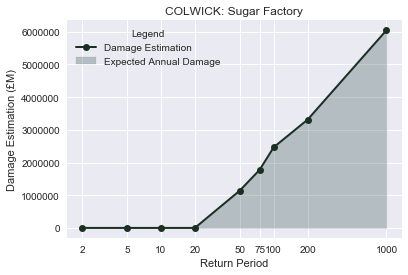

In [8]:
import dnl
from ipywidgets import VBox, HTML
ead_map, text = dnl.dnl_observation()
display(ead_map)
HTML(text)

#### Risk Analysis 1: What is the flood risk for Newark?

Update EAD with different onset of flooding assumptions

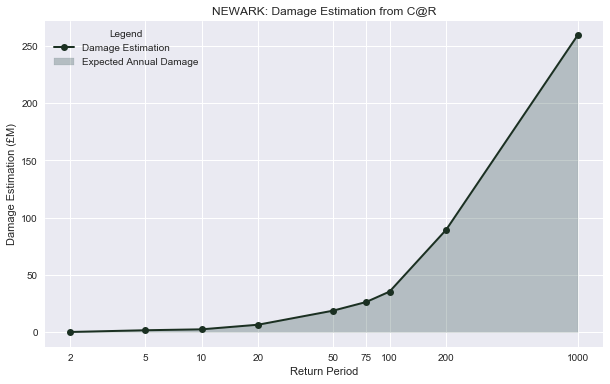


EXPECTED ANNUAL DAMAGE						Onset of Flooding Assumption

Spreadsheet Damage Estimation					Optimistic	Midpoint	Pessimistic
£2,630,847.01			Current Defence Scheme:		£2,990,942.12	£3,312,795.07	£3,751,284.98
				50 Year Defence Scheme:		£1,892,017.33	£2,022,983.93	£2,203,772.42
				100 Year Defence Scheme:	£1,605,100.95	£1,721,811.84	£1,887,153.00
				200 Year Defence Scheme:	£1,332,623.57	£1,409,444.48	£1,497,270.56
				500 Year Defence Scheme:	£737,728.62	£762,208.60	£767,279.36


EAD Breakdown by Gauging Station

4009 COLWICK £1,256,108.63
4022 NORTH MUSKHAM £412,898.18
4155 COLSTON BASSETT £2,564.86
4116 WHITEWATER BRIDGE £0.00
4115 MANSFIELD, THE DYKES £223,090.67
4065 TORKSEY £1,096,263.34
4032 CHURCH WARSOP £16.45

Total: £2,990,942.12

Proposed Flood Defence Schemes:

Scheme name:	COLWICK 2019
Cost:		£1,000,000.00
Design RP:	100
Uncertainty:	NPV Discount Rate 3%


In [5]:
import dnl
dnl.dnl_damage_estimate("NEWARK")

#### Risk Analysis 1: What is the flood risk for Newark?

Show me general information about the DNL area

In [8]:
from SPARQLWrapper import SPARQLWrapper, JSON
import folium
from folium.plugins import FastMarkerCluster

sparql_query = """
prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#>
prefix dbp: <http://dbpedia.org/property/>
prefix dbo: <http://dbpedia.org/ontology/>
prefix dbr: <http://dbpedia.org/resource/>
prefix geo: <http://www.w3.org/2003/01/geo/wgs84_pos#>

select distinct  ?postTown ?lat ?long ?comment ?population
where  { 
    service <http://dbpedia.org/sparql/> {
        dbr:Newark-on-Trent dbp:postTown ?postTown ;
                            dbp:latitude ?lat ;
                            dbp:longitude ?long ;
                            rdfs:comment ?comment ;
                            dbo:populationTotal ?population .
        filter langMatches(lang(?comment),"en")
    }
}
"""

sparql_endpoint = "http://localhost:8890/sparql"
sparql = SPARQLWrapper(sparql_endpoint)
sparql.setReturnFormat(JSON)

sparql.setQuery(sparql_query)
results = sparql.query().convert()
result = results["results"]["bindings"][0]
lat = float(result['lat']['value'])
long = float(result['long']['value'])
comment = result['comment']['value']
population = int(result['population']['value'])

dnl_map = folium.Map(location=[lat, long], zoom_start=8)
folium.GeoJson(
    'Nottingham.geojson',
    name='Nottinghamshire'
).add_to(dnl_map)
folium.GeoJson(
    'Leicestershire.geojson',
    name='Leicestershire'
).add_to(dnl_map)
folium.GeoJson(
    'Derbyshire.geojson',
    name='Derbyshire'
).add_to(dnl_map)
feature_group = folium.FeatureGroup(name='Information')
html = "Dbpedia information: " + comment + " Population: {}".format(population)
popup = folium.Popup(max_width=650, html=html)
marker = folium.Marker([lat, long],icon=folium.Icon(color='blue', prefix='fa', icon='info'), popup=popup)
feature_group.add_child(marker)
dnl_map.add_child(feature_group)
folium.LayerControl(collapsed=False).add_to(dnl_map)
dnl_map

#### Risk Analysis 1: What is the flood risk for Newark?

Show the EAD for Newark (Segemented by property type and by gauging station)

In [ ]:
from SPARQLWrapper import SPARQLWrapper, JSON
from folium.plugins import FastMarkerCluster
from ipywidgets import VBox, HTML
import folium
import EN2LatLon

query_ead_by_property_type = '''
prefix pd:  <http://ensembleprojects.org/ns/floodrisk/property_data#>
prefix xsd: <http://www.w3.org/2001/XMLSchema#>
select  ?jbapropertyType (sum(xsd:decimal(?ead_mean)) as ?ead_mean)
from <http://ensembleprojects.org/floodrisk/property>
from <http://ensembleprojects.org/graph/floodrisk/damage#0>
where {
    ?property pd:posttown "NEWARK" ;
              pd:jbapropertyType ?jbapropertyType ;
              pd:jbapropRef ?ref .
    ?newProperty pd:propRef ?ref ; 
                 pd:ead_mean ?ead_mean .
}
group by ?jbapropertyType
'''

query_ead_by_gauging_station = '''
prefix pd:  <http://ensembleprojects.org/ns/floodrisk/property_data#>
prefix xsd: <http://www.w3.org/2001/XMLSchema#>

select  ?station_name (sum(xsd:decimal(?ead_mean)) as ?ead_mean)
from <http://ensembleprojects.org/floodrisk/property>
from <http://ensembleprojects.org/graph/floodrisk/damage#0>
where {
    ?property pd:posttown "NEWARK" ;
              pd:station_name ?station_name ;
              pd:jbapropRef ?ref .
    ?newProperty pd:propRef ?ref ; 
                 pd:ead_mean ?ead_mean .
}
group by ?station_name
'''

query_properties = """
prefix pd:  <http://ensembleprojects.org/ns/floodrisk/property_data#>

select  ?jbapropRef ?bngeast ?bngnorth ?jbapropertyType
from <http://ensembleprojects.org/floodrisk/property>
from <http://ensembleprojects.org/graph/floodrisk/damage#0>
where {
    ?property pd:posttown "NEWARK" ;
              pd:station_name "COLWICK" ;
              pd:jbapropRef ?jbapropRef ;
              pd:bngeast ?bngeast ;
              pd:bngnorth ?bngnorth ;
              pd:jbapropertyType ?jbapropertyType .
}
"""

query_mapdata = """
prefix gd:    <http://ensembleprojects.org/ns/floodrisk/gauge_data#>
prefix rt:    <http://environment.data.gov.uk/flood-monitoring/def/core/>
prefix geo:   <http://www.w3.org/2003/01/geo/wgs84_pos#>

select ?lat ?long ?label
from <http://ensembleprojects.org/floodrisk/gauge>
from <http://ensembleprojects.org/floodrisk/property>
from <http://environment.data.gov.uk/flood-monitoring/id/stations.rdf>
where {
    ?local_gauge gd:station_name "COLWICK" ;
       gd:site_reference ?site_reference .
    ?ea_gauge rt:stationReference ?site_reference ;
              geo:lat ?lat ;
              geo:long ?long ;
              rdfs:label ?label .
}
"""

sparql_endpoint = "http://localhost:8890/sparql"
sparql = SPARQLWrapper(sparql_endpoint)
sparql.setReturnFormat(JSON)

sparql.setQuery(query_ead_by_property_type)
results = sparql.query().convert()
for result in results['results']['bindings']:
    if result['jbapropertyType']['value'] == 'Residential':
        residential_ead = float(result['ead_mean']['value'])
    elif result['jbapropertyType']['value'] == 'Commercial':
        commercial_ead = float(result['ead_mean']['value'])
    elif result['jbapropertyType']['value'] == 'Critical':
        critical_ead = float(result['ead_mean']['value'])

property_text = '''
<main  style="line-height: 1.5;"><u>Expected Annual Damage by Property Type</u></main><br />
<table style="width:45%">
<tr><td>Residential</td><td>£{:,d}</td></tr>
<tr><td>Commercial</td><td>£{:,d}</td></tr>
<tr><td>Critical</td><td>£{:,d}</td></tr>
</table>'''.format(int(residential_ead), int(commercial_ead), int(critical_ead))

sparql.setQuery(query_properties)
results = sparql.query().convert()

marker_property = []
marker_residential = []
marker_commercial = []
marker_critical = []
for result in results['results']['bindings']:
    bngeast = float(result['bngeast']['value'])
    bngnorth = float(result['bngnorth']['value'])
    lat, long = EN2LatLon.OSGB36toWGS84(bngeast, bngnorth)
    marker_property.append([lat, long])
    propertytype = result['jbapropertyType']['value']
    if propertytype == 'Residential':
        marker_residential.append([lat, long])
    elif propertytype == 'Commercial':
        marker_commercial.append([lat, long])
    elif propertytype == 'Critical':
        marker_critical.append([lat, long])
        
sparql.setQuery(query_ead_by_gauging_station)
results = sparql.query().convert()
for result in results['results']['bindings']:
    if result['station_name']['value'] == 'WHITEWATER BRIDGE':
        wb_ead = float(result['ead_mean']['value'])
    elif result['station_name']['value'] == 'COLWICK':
        colwick_ead = float(result['ead_mean']['value'])
    elif result['station_name']['value'] == 'COLSTON BASSETT':
        cb_ead = float(result['ead_mean']['value'])
    elif result['station_name']['value'] == 'CHURCH WARSOP':
        cw_ead = float(result['ead_mean']['value'])
    elif result['station_name']['value'] == 'NORTH MUSKHAM':
        nm_ead = float(result['ead_mean']['value'])
    elif result['station_name']['value'] == 'TORKSEY':
        torksey_ead = float(result['ead_mean']['value'])
    elif result['station_name']['value'] == 'MANSFIELD, THE DYKES':
        mtd_ead = float(result['ead_mean']['value'])

gauge_text = '''
<main  style="line-height: 1.5;"><u>Expected Annual Damage by Gauge Station</u></main><br />
<table style="width:45%">
<tr><td>WHITEWATER BRIDGE</td><td>£{:,d}</td></tr>
<tr><td>COLWICK</td><td>£{:,d}</td></tr>
<tr><td>COLSTON BASSETT</td><td>£{:,d}</td></tr>
<tr><td>CHURCH WARSOP</td><td>£{:,d}</td></tr>
<tr><td>NORTH MUSKHAM</td><td>£{:,d}</td></tr>
<tr><td>TORKSEY</td><td>£{:,d}</td></tr>
<tr><td>MANSFIELD, THE DYKES</td><td>£{:,d}</td></tr>
</table>'''.format(int(wb_ead), int(colwick_ead), int(cb_ead), int(cw_ead), int(nm_ead), int(torksey_ead), int(mtd_ead))

sparql.setQuery(query_mapdata)
results = sparql.query().convert()
result = results["results"]["bindings"][0]
station_lat = float(result['lat']['value'])
station_long = float(result['long']['value'])

def create_marker(colour):
    callback = """
        function (row){{
            var icon, marker;
            icon = L.AwesomeMarkers.icon({{markerColor: "{}"}});
            marker = L.marker(new L.LatLng(row[0], row[1]));
            marker.setIcon(icon);
            return marker;
        }};""".format(colour)
    return callback

event_map = folium.Map(location=[station_lat, station_long], zoom_start=8)

property_layer = folium.FeatureGroup(name="Property Type").add_to(event_map)
FastMarkerCluster(marker_residential, callback=create_marker("green")).add_to(property_layer)
FastMarkerCluster(marker_commercial, callback=create_marker("blue")).add_to(property_layer)
FastMarkerCluster(marker_critical, callback=create_marker("red")).add_to(property_layer)

gauge_layer = folium.FeatureGroup(name="Gauging Station").add_to(event_map)
FastMarkerCluster(marker_property, callback=create_marker("cadetblue")).add_to(gauge_layer)

folium.LayerControl(collapsed=False).add_to(event_map)
display(event_map)
VBox([HTML(property_text), HTML(gauge_text)])


#### Risk Analysis 1: What is the flood risk for Newark?

Update EAD with new empirical observations

In [ ]:
from SPARQLWrapper import SPARQLWrapper, JSON
from ipywidgets import HTML
import folium
from folium import IFrame
from folium.plugins import MarkerCluster, FastMarkerCluster
import matplotlib
import matplotlib.pyplot as plt
import base64
import EN2LatLon

query_metadata = """
prefix ed: <http://ensembleprojects.org/ns/floodrisk/event_data#>
select ?location ?rp ?properties ?source ?date
where {
    graph <http://ensembleprojects.org/graph/floodrisk/events> {
        ?s ed:location ?location ;
           ed:rp ?rp ;
           ed:properties ?properties ;
           ed:url ?source ;
           ed:date ?date .
    }
}
"""

query_existing_ead = """
prefix pd:  <http://ensembleprojects.org/ns/floodrisk/property_data#>
prefix xsd: <http://www.w3.org/2001/XMLSchema#>

select  (sum(xsd:decimal(?ead_mean)) as ?ead_mean)
from <http://ensembleprojects.org/floodrisk/property>
from <http://ensembleprojects.org/graph/floodrisk/damage#0>
where {
    ?property pd:posttown "NEWARK" .
    ?property pd:station_name "COLWICK" .
    ?property pd:jbapropRef ?ref .
    ?newProperty pd:propRef ?ref . 
    ?newProperty pd:ead_mean ?ead_mean .
}
"""

query_new_ead = """
prefix pd:  <http://ensembleprojects.org/ns/floodrisk/property_data#>
prefix dd:  <http://ensembleprojects.org/ns/floodrisk/damage_data#>
prefix xsd: <http://www.w3.org/2001/XMLSchema#>

select
    (sum(xsd:decimal(?ead)) as ?ead)
where {
    graph <http://ensembleprojects.org/floodrisk/property> {
        ?property pd:posttown "NEWARK" .
        ?property pd:station_name "COLWICK" .
        ?property pd:jbapropRef ?jbapropRef
    }
    graph <http://ensembleprojects.org/graph/floodrisk/damage#4> {
        ?newProperty pd:propRef ?jbapropRef .
        ?newProperty pd:ead ?ead 
    }
}
"""

query_mapdata = """
prefix gd:    <http://ensembleprojects.org/ns/floodrisk/gauge_data#>
prefix rt:    <http://environment.data.gov.uk/flood-monitoring/def/core/>
prefix geo:   <http://www.w3.org/2003/01/geo/wgs84_pos#>

select ?lat ?long ?label
from <http://ensembleprojects.org/floodrisk/gauge>
from <http://ensembleprojects.org/floodrisk/property>
from <http://environment.data.gov.uk/flood-monitoring/id/stations.rdf>
where {
    ?local_gauge gd:station_name "COLWICK" ;
       gd:site_reference ?site_reference .
    ?ea_gauge rt:stationReference ?site_reference ;
              geo:lat ?lat ;
              geo:long ?long ;
              rdfs:label ?label .
}
"""

query_properties = """
prefix pd:  <http://ensembleprojects.org/ns/floodrisk/property_data#>

select  ?jbapropRef ?bngeast ?bngnorth
from <http://ensembleprojects.org/floodrisk/property>
from <http://ensembleprojects.org/graph/floodrisk/damage#0>
where {
    ?property pd:posttown "NEWARK" ;
              pd:station_name "COLWICK" ;
              pd:jbapropRef ?jbapropRef ;
              pd:bngeast ?bngeast ;
              pd:bngnorth ?bngnorth .
}
"""

query_property_detail = """
prefix pd:  <http://ensembleprojects.org/ns/floodrisk/property_data#>

select  ?q2 ?q5 ?q10 ?q20 ?q50 ?q75 ?q100 ?q200 ?q1000
from <http://ensembleprojects.org/floodrisk/property>
from <http://ensembleprojects.org/graph/floodrisk/damage#0>
where {
    ?s pd:jbapropRef '51183' ;
       pd:q2_existingDamageMean ?q2 ;
       pd:q5_existingDamagelMean ?q5 ;
       pd:q10_existingDamageMean ?q10 ;
       pd:q20_existingDamageMean ?q20 ;
       pd:q50_existingDamageMean ?q50 ;
       pd:q75_existingDamageMean ?q75 ;
       pd:q100_existingDamageMean ?q100 ;
       pd:q200_existingDamageMean ?q200 ;
       pd:q1000_existingDamagelMean ?q1000 
}
"""

sparql_endpoint = "http://localhost:8890/sparql"
sparql = SPARQLWrapper(sparql_endpoint)
sparql.setReturnFormat(JSON)

sparql.setQuery(query_metadata)
results = sparql.query().convert()
result = results["results"]["bindings"][0]
location = result['location']['value']
rp = result['rp']['value']
properties = result['properties']['value']
source = result['source']['value']
date = result['date']['value']
metadata_text = '<main  style="line-height: 1.5;"><b>OBSERVED EVENTS</b><br /><br /> A flood event was observed on <b>{}</b> at <b>{}</b> gauging station (<a href="{}">Media Source</a>). The flood event was estimated to have a <b>{}</b> year return period. The <b>{}</b> flood event affected a total of <b>{}</b> properties.<br /><br /></main>'.format(date, location, source, rp, location, properties)

sparql.setQuery(query_existing_ead)
results = sparql.query().convert()
result = results["results"]["bindings"][0]
existing_ead_mean = float(result['ead_mean']['value'])

sparql.setQuery(query_new_ead)
results = sparql.query().convert()
result = results["results"]["bindings"][0]
new_ead_mean = float(result['ead']['value'])

ead_text = '<main  style="line-height: 1.5;"><u>Expected Annual Damage Calculations</u></main><br /><table style="width:45%"><tr><td>Existing Expected Annual Damage</td><td>£{:,d}</td></tr><tr><td>Expected Annual Damage including Colwick Event</td><td>£{:,d}</td></tr></table>'.format(int(existing_ead_mean),int(new_ead_mean))

sparql.setQuery(query_mapdata)
results = sparql.query().convert()
result = results["results"]["bindings"][0]
station_lat = float(result['lat']['value'])
station_long = float(result['long']['value'])

event_map = folium.Map(location=[station_lat, station_long], zoom_start=8)
folium.GeoJson(
    'Nottingham.geojson',
    name='Local Resillience Forum'
).add_to(event_map)

folium.TileLayer('Cartodb Positron', attr='Cartodb Positron').add_to(event_map)
folium.TileLayer('Mapbox Bright', attr='Mapbox Bright').add_to(event_map)
folium.TileLayer('Stamen Terrain', attr='Stamen Terrain').add_to(event_map)

gauge_layer = folium.FeatureGroup(name="Gauge Station").add_to(event_map)
popup_text = '<table style="width:100%"><tr><td>Existing Expected Annual Damage</td><td>£{:,d}</td></tr><tr><td>Expected Annual Damage including Colwick Event</td><td>£{:,d}</td></tr></table>'.format(int(existing_ead_mean),int(new_ead_mean))
folium.Marker(location=[station_lat, station_long],
                  icon=folium.Icon(color='blue', prefix='fa', icon='tachometer'),
                  popup=popup_text).add_to(gauge_layer)

property_layer = folium.FeatureGroup(name="Properties").add_to(event_map)
property_cluster = MarkerCluster().add_to(property_layer)

sparql.setQuery(query_properties)
results = sparql.query().convert()
markers = []
for result in results['results']['bindings']:
    bngeast = float(result['bngeast']['value'])
    bngnorth = float(result['bngnorth']['value'])
    lat, long = EN2LatLon.OSGB36toWGS84(bngeast, bngnorth)
    markers.append([lat, long])
    if result['jbapropRef']['value'] == '51183':
        sparql.setQuery(query_property_detail)
        results = sparql.query().convert()
        result = results["results"]["bindings"][0]
        x = [2,5,10,20,50,75,100,200,1000]
        y = []
        y.append(float(result['q2']['value']))
        y.append(float(result['q5']['value']))
        y.append(float(result['q10']['value']))
        y.append(float(result['q20']['value']))
        y.append(float(result['q50']['value']))
        y.append(float(result['q75']['value']))
        y.append(float(result['q100']['value']))
        y.append(float(result['q200']['value']))
        y.append(float(result['q1000']['value']))
        
        fig = plt.figure(figsize=(6, 4))
        ax1 = fig.add_subplot(1,1,1)
        line, = ax1.plot(x, y, color='#1B3022', marker='o', lw=2, label="Damage Estimation")
        fill = plt.fill_between(x,y,0.1,color='#395756', label='Expected Annual Damage')
        matplotlib.pyplot.setp(fill, alpha=0.3)
        ax1.set_xlabel("Return Period")
        ax1.set_ylabel("Damage Estimation (£M)")
        ax1.set_xscale('log')
        ax1.set_xticks([2,5,10,20,50,75,100,200,1000])
        ax1.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
        ax1.get_xaxis().set_tick_params(which='minor', size=0)
        ax1.get_xaxis().set_tick_params(which='minor', width=0)
        ax1.set_title("COLWICK: Sugar Factory")
        plt.legend(loc='upper left', title='Legend')
        plt.savefig("tmp.png", dpi=75)
        resolution, width, height = 75, 6, 4
        encoded = base64.b64encode(open('tmp.png', 'rb').read()).decode()
        html = '<img src="data:image/png;base64,{}">'.format(encoded)
        iframe = IFrame(html, width=(width*resolution)+20, height=(height*resolution)+20)
        popup = folium.Popup(iframe, max_width=2650)
        folium.Marker(location=[lat, long],
                  icon=folium.Icon(color='red', prefix='fa', icon='bar-chart'), 
                  popup=popup).add_to(event_map)
       
FastMarkerCluster(markers).add_to(property_cluster)
    

folium.LayerControl().add_to(event_map)

text = metadata_text + ead_text
display(event_map)
HTML(text)


#### Risk Analysis 1: What is the flood risk for Newark?

Update EAD with different onset of flooding assumptions

In [ ]:
from SPARQLWrapper import SPARQLWrapper, JSON
import folium
import EN2LatLon
from utility import *
import floodlevel

def gaugeStation(name):

    gaugingStation_Query = """
    prefix gd:    <http://ensembleprojects.org/ns/floodrisk/gauge_data#>
    prefix rdfs:  <http://www.w3.org/2000/01/rdf-schema#>
    prefix rt:    <http://environment.data.gov.uk/flood-monitoring/def/core/>
    prefix geo:   <http://www.w3.org/2003/01/geo/wgs84_pos#>

    select ?lat ?long ?label ?catchmentName ?riverName
    from <http://ensembleprojects.org/floodrisk/gauge>
    from <http://ensembleprojects.org/floodrisk/property>
    from <http://environment.data.gov.uk/flood-monitoring/id/stations.rdf>
    where {{
        ?station gd:station_name "{}" .
        ?station gd:site_reference ?site_reference .
        ?s rt:stationReference ?site_reference .
        ?s rt:catchmentName ?catchmentName .
        ?s rt:riverName ?riverName .
        ?s geo:lat ?lat .
        ?s geo:long ?long .
        ?s rdfs:label ?label .
    }}

    """.format(name)
    
    property_Query = """
    prefix g:     <http://ensembleprojects.org/ns/floodrisk/gauge#>
    prefix gd:    <http://ensembleprojects.org/ns/floodrisk/gauge_data#>
    prefix p:     <http://ensembleprojects.org/ns/floodrisk/property#>
    prefix pd:    <http://ensembleprojects.org/ns/floodrisk/property_data#>
    prefix rdfs:  <http://www.w3.org/2000/01/rdf-schema#>
    prefix rt:    <http://environment.data.gov.uk/flood-monitoring/def/core/>
    prefix geo:   <http://www.w3.org/2003/01/geo/wgs84_pos#>

    select  ?q2_existingDamageMean
            ?q5_existingDamageMean
            ?q10_existingDamageMean
            ?q20_existingDamageMean
            ?q50_existingDamageMean
            ?bngeast ?bngnorth ?property_thresh ?threshold_source
    from <http://ensembleprojects.org/floodrisk/gauge>
    from <http://ensembleprojects.org/floodrisk/property>
    from <http://environment.data.gov.uk/flood-monitoring/id/stations.rdf>
    where {{
        ?property pd:station_name "{}" .
        ?property pd:bngeast ?bngeast .
        ?property pd:bngnorth ?bngnorth .
        ?property pd:q2_existingDamageMean ?q2_existingDamageMean .
        ?property pd:q5_existingDamagelMean ?q5_existingDamageMean .
        ?property pd:q10_existingDamageMean ?q10_existingDamageMean .
        ?property pd:q20_existingDamageMean ?q20_existingDamageMean .
        ?property pd:q50_existingDamageMean ?q50_existingDamageMean .
        ?property pd:property_thresh ?property_thresh .
        ?property pd:threshold_source ?threshold_source .
    }}
    limit 50
    """.format(name)

    # Assumes OpenLink Virtuoso sparql endpoint running at:
    sparql_endpoint = "http://localhost:8890/sparql"

    sparql = SPARQLWrapper(sparql_endpoint)
    sparql.setReturnFormat(JSON)

    sparql.setQuery(gaugingStation_Query)
    gaugingStation_results = sparql.query().convert()
    stationPopup = "Name: {}<br />River Name: {}<br />Catchment Name: {}".format(
        gaugingStation_results["results"]["bindings"][0]["label"]["value"],
        gaugingStation_results["results"]["bindings"][0]["riverName"]["value"],
        gaugingStation_results["results"]["bindings"][0]["catchmentName"]["value"]
    )

    sparql.setQuery(property_Query)
    property_results = sparql.query().convert()
    
    lat = gaugingStation_results["results"]["bindings"][0]["lat"]["value"]
    lon = gaugingStation_results["results"]["bindings"][0]["long"]["value"]
    label = gaugingStation_results["results"]["bindings"][0]["label"]["value"]

    map_osm = folium.Map(location=[float(lat), float(lon)],zoom_start=11)
    folium.Marker(location=[float(lat), float(lon)],
                  icon=folium.Icon(color='blue', prefix='fa', icon='tachometer'),
                  popup=stationPopup).add_to(map_osm)

    for result in property_results["results"]["bindings"]:
        lat, lon = EN2LatLon.OSGB36toWGS84(float(result["bngeast"]["value"]), float(result["bngnorth"]["value"]))
        propertyPopup = """Threshold: {}<br />Threshold Source: {}<br />
                            Q2 Existing Damage Mean: {}<br />
                            Q5 Existing Damage Mean: {}<br />
                            Q10 Existing Damage Mean: {}<br />
                            Q20 Existing Damage Mean: {}<br />
                            Q50 Existing Damage Mean: {}""".format(
                                result["property_thresh"]["value"],
                                result["threshold_source"]["value"],
                                result["q2_existingDamageMean"]["value"],
                                result["q5_existingDamageMean"]["value"],
                                result["q10_existingDamageMean"]["value"],
                                result["q20_existingDamageMean"]["value"],
                                result["q50_existingDamageMean"]["value"]
                                )

        folium.Marker(location=[lat, lon],
                      icon=folium.Icon(color='lightred', prefix='fa', icon='home'),
                      popup=propertyPopup).add_to(map_osm)
    return map_osm

def stations():

    sparql_query = """
    prefix g:       <http://ensembleprojects.org/ns/floodrisk/gauge#>
    prefix gd:      <http://ensembleprojects.org/ns/floodrisk/gauge_data#>
    prefix p:       <http://ensembleprojects.org/ns/floodrisk/property#>
    prefix pd:      <http://ensembleprojects.org/ns/floodrisk/property_data#>

    select ?name
    where {
        ?station gd:station_name ?name .
    }
    """
    # Assumes OpenLink Virtuoso sparql endpoint running at:
    sparql_endpoint = "http://localhost:8890/sparql"

    sparql = SPARQLWrapper(sparql_endpoint)
    sparql.setQuery(sparql_query)
    sparql.setReturnFormat(JSON)
    results = sparql.query().convert()

    station_list = []
    for result in results["results"]["bindings"]:
        station_list.append(result["name"]["value"])
    return station_list

def modelCheck(datestamp):
    sparql_query = """
      PREFIX  xsd:  <http://www.w3.org/2001/XMLSchema#>
      PREFIX  gd:   <http://ensembleprojects.org/ns/floodrisk/gauge_data#>
      PREFIX rt:    <http://environment.data.gov.uk/flood-monitoring/def/core/>
      PREFIX geo:   <http://www.w3.org/2003/01/geo/wgs84_pos#>

      SELECT ?station_name ?label ?lat ?long ?model_name ?company ?date
      FROM <http://ensembleprojects.org/gauge>
      FROM <http://ensembleprojects.org/floodrisk/gauge>
      FROM <http://environment.data.gov.uk/flood-monitoring/id/stations.rdf>
      WHERE {{
        ?station_name gd:station_model_id ?model_id .
        ?station_name gd:site_reference ?site_id .
        ?ea_station rt:stationReference ?site_id .
        ?ea_station geo:lat ?lat .
        ?ea_station geo:long ?long .
        ?ea_station rdfs:label ?label .
        ?model_id gd:station_model_name ?model_name .
        ?model_id gd:station_model_company ?company .
        ?model_id gd:station_model_date ?date .
        FILTER (xsd:date(?date) < "{}"^^xsd:date)
     }}
     """.format(datestamp)
    sparql_endpoint = "http://localhost:8890/sparql"
    sparql = SPARQLWrapper(sparql_endpoint)
    sparql.setReturnFormat(JSON)
    sparql.setQuery(sparql_query)
    results = sparql.query().convert()
    lat = results["results"]["bindings"][0]["lat"]["value"]
    long = results["results"]["bindings"][0]["long"]["value"]
    label = results["results"]["bindings"][0]["label"]["value"]
    map_osm = folium.Map(location=[float(lat), float(long)],zoom_start=8)
    for result in results['results']['bindings']:
        lat = result['lat']['value']
        long = result['long']['value']
        label = result['label']['value']
        model = result['model_name']['value']
        company = result['company']['value']
        date = result['date']['value']
        popupText = "Station: {}, Model: {}, Company: {}, Date: {}".format(label,model,company,date)
        folium.Marker(location=[float(lat), float(long)],
                 icon=folium.Icon(color='red', prefix='fa', icon='tachometer'),
                 popup=popupText).add_to(map_osm)
    return map_osm

def damageEstimate(spatial_area):
    sparql_endpoint = "http://localhost:8890/sparql"
    sparql = SPARQLWrapper(sparql_endpoint)
    sparql.setReturnFormat(JSON)
    POSTTOWN = spatial_area

    floodlevel.c_at_r_ead(spatial_area)

    sparql_query = getPosttownDamageOriginal(POSTTOWN)
    sparql.setQuery(sparql_query)
    results = sparql.query().convert()
    returnPeriods = [2,5,10,20,50,75,100,200,1000]
    damageEstimations = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
    for result in results['results']['bindings']:
        n = 0
        for returnPeriod in result:
            damageEstimations[n] += float(result[returnPeriod]['value'])
            n += 1

    sumDamageEstimations = 0
    for n in range(len(returnPeriods)):
        #if returnPeriods[n] != 0:
            sumDamageEstimations += damageEstimations[n] * (1 / returnPeriods[n])

    damageRange = {}
    for i in range(3):
        sparql_query = getPosttownDamageUpdatedMean(i, spatial_area)
        sparql.setQuery(sparql_query)
        results = sparql.query().convert()
        damage = {}
        damage['meanDamage'] = 0.0
        damage['meanDamage_50'] = 0.0
        damage['meanDamage_100'] = 0.0
        damage['meanDamage_200'] = 0.0
        damage['meanDamage_500'] = 0.0
        for result in results['results']['bindings']:
            damage['meanDamage'] += float(result['ead_mean']['value'])
            damage['meanDamage_50'] += float(result['ead_mean_50']['value'])
            damage['meanDamage_100'] += float(result['ead_mean_100']['value'])
            damage['meanDamage_200'] += float(result['ead_mean_200']['value'])
            damage['meanDamage_500'] += float(result['ead_mean_500']['value'])
        damageRange[i] = damage
    
    print("\nEXPECTED ANNUAL DAMAGE\t\t\t\t\t\tOnset of Flooding Assumption\n")
    print("Spreadsheet Damage Estimation\t\t\t\t\tOptimistic\tMidpoint\tPessimistic")
    print('£{:,.2f}\t\t\tCurrent Defence Scheme:\t\t£{:,.2f}\t£{:,.2f}\t£{:,.2f}'.format(
        sumDamageEstimations,damageRange[0]['meanDamage'],damageRange[2]['meanDamage'],damageRange[1]['meanDamage']))
    print('\t\t\t\t50 Year Defence Scheme:\t\t£{:,.2f}\t£{:,.2f}\t£{:,.2f}'.format(
        damageRange[0]['meanDamage_50'],damageRange[2]['meanDamage_50'],damageRange[1]['meanDamage_50']))
    print('\t\t\t\t100 Year Defence Scheme:\t£{:,.2f}\t£{:,.2f}\t£{:,.2f}'.format(
        damageRange[0]['meanDamage_100'],damageRange[2]['meanDamage_100'],damageRange[1]['meanDamage_100']))
    print('\t\t\t\t200 Year Defence Scheme:\t£{:,.2f}\t£{:,.2f}\t£{:,.2f}'.format(
        damageRange[0]['meanDamage_200'],damageRange[2]['meanDamage_200'],damageRange[1]['meanDamage_200']))
    print('\t\t\t\t500 Year Defence Scheme:\t£{:,.2f}\t£{:,.2f}\t£{:,.2f}'.format(
        damageRange[0]['meanDamage_500'],damageRange[2]['meanDamage_500'],damageRange[1]['meanDamage_500']))

    sparql_query = """
      PREFIX pd: <http://ensembleprojects.org/ns/floodrisk/property_data#>
      SELECT distinct ?gauge_siteRef ?station_name
      FROM <http://ensembleprojects.org/floodrisk/property>
      WHERE {{
        ?property pd:posttown "{}" .
        ?property pd:gauge_siteRef ?gauge_siteRef .
        ?property pd:station_name ?station_name
      }}
    """.format(POSTTOWN)

    print("\n\nEAD Breakdown by Gauging Station\n")
    sparql.setQuery(sparql_query)
    results = sparql.query().convert()
    total = 0.0
    for result in results['results']['bindings']:
        query = getGaugingStationDamageUpdatedMean(0, POSTTOWN, result['station_name']['value'])
        sparql.setQuery(query)
        stationDamages = sparql.query().convert()
        ead = 0.0
        for damage in stationDamages['results']['bindings']:
            ead += float(damage['ead_mean']['value'])
        print(result['gauge_siteRef']['value'], result['station_name']['value'], '£{:,.2f}'.format(ead))
        total += ead
    print("\nTotal: £{:,.2f}".format(total))
    
    sparql_query = """
      prefix defence: <http://ensembleprojects.org/ns/floodrisk/defence#>
      prefix defence_data: <http://ensembleprojects.org/ns/floodrisk/defence_data#>
      select *
      from <http://ensembleprojects.org/graph/floodrisk/defenceSchemes>
      where {
        defence:0 defence_data:name ?name ;
           defence_data:cost ?cost ;
           defence_data:RP ?RP ;
           defence_data:uncertainty ?uncertainty
    }
    """
    sparql.setQuery(sparql_query)
    results = sparql.query().convert()
    print("\nProposed Flood Defence Schemes:")
    for result in results['results']['bindings']:
        print("\nScheme name:\t" + result['name']['value'])
        print('Cost:\t\t£{:,.2f}'.format(float(result['cost']['value'])))
        print("Design RP:\t" + result['RP']['value'])
        print("Uncertainty:\t" + result['uncertainty']['value'])
        
        
from ipywidgets import interact
interact(damageEstimate, spatial_area=['NEWARK', 'LOUGHBOROUGH', 'NOTTINGHAM']);

In [ ]:
from SPARQLWrapper import SPARQLWrapper, JSON
from ipywidgets import VBox, HTML
import folium
import EN2LatLon

sparql_endpoint = "http://localhost:8890/sparql"
sparql = SPARQLWrapper(sparql_endpoint)
sparql.setReturnFormat(JSON)

query = '''
prefix pd:  <http://ensembleprojects.org/ns/floodrisk/property_data#>
prefix xsd: <http://www.w3.org/2001/XMLSchema#>

select  ?fwa_name (sum(xsd:decimal(?ead_mean)) as ?ead_mean)
from <http://ensembleprojects.org/floodrisk/property>
from <http://ensembleprojects.org/graph/floodrisk/damage#0>
where {
    ?property pd:posttown "NEWARK" ;
              pd:fwa_name ?fwa_name ;
              pd:jbapropRef ?ref .
    ?newProperty pd:propRef ?ref ; 
                 pd:ead_mean ?ead_mean .
}
group by ?fwa_name
'''

def html_str(title, names, values):
    text = '''
        <main  style="line-height: 1.5;"><u>{}</u></main><br />
        <table style="width:45%">
    '''.format(title)
    for i in range(len(names)):
        text += '<tr><td>' + names[i] + '</td><td>£{:,d}</td></tr>'
    text += '</table>'
    return text.format(*values)
    
sparql.setQuery(query)
results = sparql.query().convert()

title = 'Expected Annual Damage by Flood Warning Area'
names = []
values = []
for result in results['results']['bindings']:
    names.append(result['fwa_name']['value'])
    values.append(int(float(result['ead_mean']['value'])))

HTML(html_str(title, names, values))

#### Example 1: Show gauging stations where model studies occured before a specific date

In [ ]:
from ipywidgets import interact
import gauges

interact(gauges.modelCheck, datestamp={'Pre 2007':'2007-01-01', 'Pre 2010':'2010-01-01', 'Pre 2012':'2012-01-01'});

#### Example 2: Shows predicted flood level against gauge level for an individual property and current real-time river level

In [ ]:
from ipywidgets import interact
import floodlevel

interact(floodlevel.damageEstimate, property={'28, NG15 7UG, NOTTINGHAM':24, '69, NG15 6NJ, NOTTINGHAM':169});

#### Example 3:  Damage estimation from Communities @ Risk data

In [ ]:
from ipywidgets import interact
import floodlevel

interact(floodlevel.c_at_r_ead, posttown=['NEWARK','LOUGHBOROUGH','NOTTINGHAM']);

#### Example 4: What new statistical damage estimations are available?

In [ ]:
from SPARQLWrapper import SPARQLWrapper, JSON

sparql_query = """
PREFIX damage: <http://ensembleprojects.org/ns/floodrisk/damage#>
PREFIX damage_data: <http://ensembleprojects.org/ns/floodrisk/damage_data#>
SELECT DISTINCT ?damageEstimates 
FROM <http://ensembleprojects.org/graph/floodrisk/damageEstimates>
WHERE {
  ?damageEstimates ?p ?o
}
ORDER BY ?damageEstimates
"""
# Assumes OpenLink Virtuoso sparql endpoint running at:
sparql_endpoint = "http://localhost:8890/sparql"

sparql = SPARQLWrapper(sparql_endpoint)
sparql.setQuery(sparql_query)
sparql.setReturnFormat(JSON)
results = sparql.query().convert()

for result in results["results"]["bindings"]:
    print (result["damageEstimates"]["value"])

#### Example 5: Show meta-data for the new damage functions

In [ ]:
from ipywidgets import interact
import floodlevel

interact(floodlevel.damageEstimateMetaData, onsetOfFlooding={'Optimistic':0, 'Pessimistic':1, 'Midpoint':2});

#### Example 6: Show flood risk for a given area

In [ ]:
from ipywidgets import interact
import gauges

interact(gauges.damageEstimate, spatial_area=['NEWARK', 'LOUGHBOROUGH', 'NOTTINGHAM']);

In [ ]:
from SPARQLWrapper import SPARQLWrapper, JSON
import folium
import EN2LatLon
from utility import *
import floodlevel

def gaugeStation(name):

    gaugingStation_Query = """
    prefix gd:    <http://ensembleprojects.org/ns/floodrisk/gauge_data#>
    prefix rdfs:  <http://www.w3.org/2000/01/rdf-schema#>
    prefix rt:    <http://environment.data.gov.uk/flood-monitoring/def/core/>
    prefix geo:   <http://www.w3.org/2003/01/geo/wgs84_pos#>

    select ?lat ?long ?label ?catchmentName ?riverName
    from <http://ensembleprojects.org/floodrisk/gauge>
    from <http://ensembleprojects.org/floodrisk/property>
    from <http://environment.data.gov.uk/flood-monitoring/id/stations.rdf>
    where {{
        ?station gd:station_name "{}" .
        ?station gd:site_reference ?site_reference .
        ?s rt:stationReference ?site_reference .
        ?s rt:catchmentName ?catchmentName .
        ?s rt:riverName ?riverName .
        ?s geo:lat ?lat .
        ?s geo:long ?long .
        ?s rdfs:label ?label .
    }}

    """.format(name)
    
    property_Query = """
    prefix g:     <http://ensembleprojects.org/ns/floodrisk/gauge#>
    prefix gd:    <http://ensembleprojects.org/ns/floodrisk/gauge_data#>
    prefix p:     <http://ensembleprojects.org/ns/floodrisk/property#>
    prefix pd:    <http://ensembleprojects.org/ns/floodrisk/property_data#>
    prefix rdfs:  <http://www.w3.org/2000/01/rdf-schema#>
    prefix rt:    <http://environment.data.gov.uk/flood-monitoring/def/core/>
    prefix geo:   <http://www.w3.org/2003/01/geo/wgs84_pos#>

    select  ?q2_existingDamageMean
            ?q5_existingDamageMean
            ?q10_existingDamageMean
            ?q20_existingDamageMean
            ?q50_existingDamageMean
            ?bngeast ?bngnorth ?property_thresh ?threshold_source
    from <http://ensembleprojects.org/floodrisk/gauge>
    from <http://ensembleprojects.org/floodrisk/property>
    from <http://environment.data.gov.uk/flood-monitoring/id/stations.rdf>
    where {{
        ?property pd:station_name "{}" .
        ?property pd:bngeast ?bngeast .
        ?property pd:bngnorth ?bngnorth .
        ?property pd:q2_existingDamageMean ?q2_existingDamageMean .
        ?property pd:q5_existingDamagelMean ?q5_existingDamageMean .
        ?property pd:q10_existingDamageMean ?q10_existingDamageMean .
        ?property pd:q20_existingDamageMean ?q20_existingDamageMean .
        ?property pd:q50_existingDamageMean ?q50_existingDamageMean .
        ?property pd:property_thresh ?property_thresh .
        ?property pd:threshold_source ?threshold_source .
    }}
    limit 50
    """.format(name)

    # Assumes OpenLink Virtuoso sparql endpoint running at:
    sparql_endpoint = "http://localhost:8890/sparql"

    sparql = SPARQLWrapper(sparql_endpoint)
    sparql.setReturnFormat(JSON)

    sparql.setQuery(gaugingStation_Query)
    gaugingStation_results = sparql.query().convert()
    stationPopup = "Name: {}<br />River Name: {}<br />Catchment Name: {}".format(
        gaugingStation_results["results"]["bindings"][0]["label"]["value"],
        gaugingStation_results["results"]["bindings"][0]["riverName"]["value"],
        gaugingStation_results["results"]["bindings"][0]["catchmentName"]["value"]
    )

    sparql.setQuery(property_Query)
    property_results = sparql.query().convert()
    
    lat = gaugingStation_results["results"]["bindings"][0]["lat"]["value"]
    lon = gaugingStation_results["results"]["bindings"][0]["long"]["value"]
    label = gaugingStation_results["results"]["bindings"][0]["label"]["value"]

    map_osm = folium.Map(location=[float(lat), float(lon)],zoom_start=11)
    folium.Marker(location=[float(lat), float(lon)],
                  icon=folium.Icon(color='blue', prefix='fa', icon='tachometer'),
                  popup=stationPopup).add_to(map_osm)

    for result in property_results["results"]["bindings"]:
        lat, lon = EN2LatLon.OSGB36toWGS84(float(result["bngeast"]["value"]), float(result["bngnorth"]["value"]))
        propertyPopup = """Threshold: {}<br />Threshold Source: {}<br />
                            Q2 Existing Damage Mean: {}<br />
                            Q5 Existing Damage Mean: {}<br />
                            Q10 Existing Damage Mean: {}<br />
                            Q20 Existing Damage Mean: {}<br />
                            Q50 Existing Damage Mean: {}""".format(
                                result["property_thresh"]["value"],
                                result["threshold_source"]["value"],
                                result["q2_existingDamageMean"]["value"],
                                result["q5_existingDamageMean"]["value"],
                                result["q10_existingDamageMean"]["value"],
                                result["q20_existingDamageMean"]["value"],
                                result["q50_existingDamageMean"]["value"]
                                )

        folium.Marker(location=[lat, lon],
                      icon=folium.Icon(color='lightred', prefix='fa', icon='home'),
                      popup=propertyPopup).add_to(map_osm)
    return map_osm

def stations():

    sparql_query = """
    prefix g:       <http://ensembleprojects.org/ns/floodrisk/gauge#>
    prefix gd:      <http://ensembleprojects.org/ns/floodrisk/gauge_data#>
    prefix p:       <http://ensembleprojects.org/ns/floodrisk/property#>
    prefix pd:      <http://ensembleprojects.org/ns/floodrisk/property_data#>

    select ?name
    where {
        ?station gd:station_name ?name .
    }
    """
    # Assumes OpenLink Virtuoso sparql endpoint running at:
    sparql_endpoint = "http://localhost:8890/sparql"

    sparql = SPARQLWrapper(sparql_endpoint)
    sparql.setQuery(sparql_query)
    sparql.setReturnFormat(JSON)
    results = sparql.query().convert()

    station_list = []
    for result in results["results"]["bindings"]:
        station_list.append(result["name"]["value"])
    return station_list

def modelCheck(datestamp):
    sparql_query = """
      PREFIX  xsd:  <http://www.w3.org/2001/XMLSchema#>
      PREFIX  gd:   <http://ensembleprojects.org/ns/floodrisk/gauge_data#>
      PREFIX rt:    <http://environment.data.gov.uk/flood-monitoring/def/core/>
      PREFIX geo:   <http://www.w3.org/2003/01/geo/wgs84_pos#>

      SELECT ?station_name ?label ?lat ?long ?model_name ?company ?date
      FROM <http://ensembleprojects.org/gauge>
      FROM <http://ensembleprojects.org/floodrisk/gauge>
      FROM <http://environment.data.gov.uk/flood-monitoring/id/stations.rdf>
      WHERE {{
        ?station_name gd:station_model_id ?model_id .
        ?station_name gd:site_reference ?site_id .
        ?ea_station rt:stationReference ?site_id .
        ?ea_station geo:lat ?lat .
        ?ea_station geo:long ?long .
        ?ea_station rdfs:label ?label .
        ?model_id gd:station_model_name ?model_name .
        ?model_id gd:station_model_company ?company .
        ?model_id gd:station_model_date ?date .
        FILTER (xsd:date(?date) < "{}"^^xsd:date)
     }}
     """.format(datestamp)
    sparql_endpoint = "http://localhost:8890/sparql"
    sparql = SPARQLWrapper(sparql_endpoint)
    sparql.setReturnFormat(JSON)
    sparql.setQuery(sparql_query)
    results = sparql.query().convert()
    lat = results["results"]["bindings"][0]["lat"]["value"]
    long = results["results"]["bindings"][0]["long"]["value"]
    label = results["results"]["bindings"][0]["label"]["value"]
    map_osm = folium.Map(location=[float(lat), float(long)],zoom_start=8)
    for result in results['results']['bindings']:
        lat = result['lat']['value']
        long = result['long']['value']
        label = result['label']['value']
        model = result['model_name']['value']
        company = result['company']['value']
        date = result['date']['value']
        popupText = "Station: {}, Model: {}, Company: {}, Date: {}".format(label,model,company,date)
        folium.Marker(location=[float(lat), float(long)],
                 icon=folium.Icon(color='red', prefix='fa', icon='tachometer'),
                 popup=popupText).add_to(map_osm)
    return map_osm

def damageEstimate(spatial_area):
    sparql_endpoint = "http://localhost:8890/sparql"
    sparql = SPARQLWrapper(sparql_endpoint)
    sparql.setReturnFormat(JSON)
    POSTTOWN = spatial_area

    floodlevel.c_at_r_ead(spatial_area)

    sparql_query = getPosttownDamageOriginal(POSTTOWN)
    sparql.setQuery(sparql_query)
    results = sparql.query().convert()
    returnPeriods = [2,5,10,20,50,75,100,200,1000]
    damageEstimations = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
    for result in results['results']['bindings']:
        n = 0
        for returnPeriod in result:
            damageEstimations[n] += float(result[returnPeriod]['value'])
            n += 1

    sumDamageEstimations = 0
    for n in range(len(returnPeriods)):
        #if returnPeriods[n] != 0:
            sumDamageEstimations += damageEstimations[n] * (1 / returnPeriods[n])

    damageRange = {}
    for i in range(3):
        sparql_query = getPosttownDamageUpdatedMean(i, spatial_area)
        sparql.setQuery(sparql_query)
        results = sparql.query().convert()
        damage = {}
        damage['meanDamage'] = 0.0
        damage['meanDamage_50'] = 0.0
        damage['meanDamage_100'] = 0.0
        damage['meanDamage_200'] = 0.0
        damage['meanDamage_500'] = 0.0
        for result in results['results']['bindings']:
            damage['meanDamage'] += float(result['ead_mean']['value'])
            damage['meanDamage_50'] += float(result['ead_mean_50']['value'])
            damage['meanDamage_100'] += float(result['ead_mean_100']['value'])
            damage['meanDamage_200'] += float(result['ead_mean_200']['value'])
            damage['meanDamage_500'] += float(result['ead_mean_500']['value'])
        damageRange[i] = damage
    
    print("\nEXPECTED ANNUAL DAMAGE\t\t\t\t\t\tOnset of Flooding Assumption\n")
    print("Spreadsheet Damage Estimation\t\t\t\t\tOptimistic\tMidpoint\tPessimistic")
    print('£{:,.2f}\t\t\tCurrent Defence Scheme:\t\t£{:,.2f}\t£{:,.2f}\t£{:,.2f}'.format(
        sumDamageEstimations,damageRange[0]['meanDamage'],damageRange[2]['meanDamage'],damageRange[1]['meanDamage']))
    print('\t\t\t\t50 Year Defence Scheme:\t\t£{:,.2f}\t£{:,.2f}\t£{:,.2f}'.format(
        damageRange[0]['meanDamage_50'],damageRange[2]['meanDamage_50'],damageRange[1]['meanDamage_50']))
    print('\t\t\t\t100 Year Defence Scheme:\t£{:,.2f}\t£{:,.2f}\t£{:,.2f}'.format(
        damageRange[0]['meanDamage_100'],damageRange[2]['meanDamage_100'],damageRange[1]['meanDamage_100']))
    print('\t\t\t\t200 Year Defence Scheme:\t£{:,.2f}\t£{:,.2f}\t£{:,.2f}'.format(
        damageRange[0]['meanDamage_200'],damageRange[2]['meanDamage_200'],damageRange[1]['meanDamage_200']))
    print('\t\t\t\t500 Year Defence Scheme:\t£{:,.2f}\t£{:,.2f}\t£{:,.2f}'.format(
        damageRange[0]['meanDamage_500'],damageRange[2]['meanDamage_500'],damageRange[1]['meanDamage_500']))

    sparql_query = """
      PREFIX pd: <http://ensembleprojects.org/ns/floodrisk/property_data#>
      SELECT distinct ?gauge_siteRef ?station_name
      FROM <http://ensembleprojects.org/floodrisk/property>
      WHERE {{
        ?property pd:posttown "{}" .
        ?property pd:gauge_siteRef ?gauge_siteRef .
        ?property pd:station_name ?station_name
      }}
    """.format(POSTTOWN)

    print("\n\nEAD Breakdown by Gauging Station\n")
    sparql.setQuery(sparql_query)
    results = sparql.query().convert()
    total = 0.0
    for result in results['results']['bindings']:
        query = getGaugingStationDamageUpdatedMean(0, POSTTOWN, result['station_name']['value'])
        sparql.setQuery(query)
        stationDamages = sparql.query().convert()
        ead = 0.0
        for damage in stationDamages['results']['bindings']:
            ead += float(damage['ead_mean']['value'])
        print(result['gauge_siteRef']['value'], result['station_name']['value'], '£{:,.2f}'.format(ead))
        total += ead
    print("\nTotal: £{:,.2f}".format(total))
    
    sparql_query = """
      prefix defence: <http://ensembleprojects.org/ns/floodrisk/defence#>
      prefix defence_data: <http://ensembleprojects.org/ns/floodrisk/defence_data#>
      select *
      from <http://ensembleprojects.org/graph/floodrisk/defenceSchemes>
      where {
        defence:0 defence_data:name ?name ;
           defence_data:cost ?cost ;
           defence_data:RP ?RP ;
           defence_data:uncertainty ?uncertainty
    }
    """
    sparql.setQuery(sparql_query)
    results = sparql.query().convert()
    print("\nProposed Flood Defence Schemes:")
    for result in results['results']['bindings']:
        print("\nScheme name:\t" + result['name']['value'])
        print('Cost:\t\t£{:,.2f}'.format(float(result['cost']['value'])))
        print("Design RP:\t" + result['RP']['value'])
        print("Uncertainty:\t" + result['uncertainty']['value'])
        
        
from ipywidgets import interact
interact(damageEstimate, spatial_area=['NEWARK', 'LOUGHBOROUGH', 'NOTTINGHAM']);